# Task 1

# Predict the percentage of marks of an student based on the number of study hours

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Submitted By - Yaswanth Reddy sunkara

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()
#Pandas head() method is used to return top n (5 by default)
#rows of a data frame or series.

#s_data["Hours"] is used to extract hours columns from above dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:


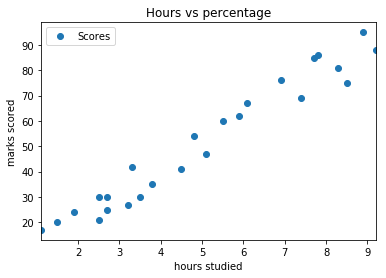

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('hours studied')
plt.ylabel('marks scored')
plt.show()

In [4]:
#To see the statistical details of the given dataset,we can use describe()
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X=s_data[['Hours']].values
print(X)
y=s_data['Scores'].values
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
#train_test_split is used to split the hours into test and train and here 
#test size =0.2 means test size 20% and training size is 80% and if random state is 0 then we get same values when we excuete each time 
print(X_train)
print(X_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [7]:
len(X_train)

20

In [8]:
len(X_test)

5

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression() 
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


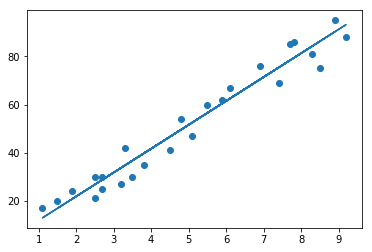

In [10]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
#regression coefficient for given data
reg.coef_

array([9.91065648])

In [12]:
#regression intercept for given data
reg.intercept_

2.018160041434683

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
y_pred = reg.predict(X_test) # Predicting the scores

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# You can also test with your own data
hours_per_day =9.25
own_pred=reg.predict([[hours_per_day]])
print("No of Hours = {}".format([[hours_per_day]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
